# Part 1

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial import distance_matrix as dm
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.drop(columns='class', axis=0, inplace=True)
df


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
scaler = MinMaxScaler()
scaler.fit(df)
df2 = scaler.transform(df)
df2

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [5]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k, n_init=10)
    km.fit(df2)
    sse.append(km.inertia_)
sse

[41.13817202297777,
 12.14368828157972,
 6.998114004826761,
 5.532831003081897,
 4.58075037306115,
 3.91469597718853,
 3.4688033178060045,
 3.1576580081919743,
 2.811763196849707]

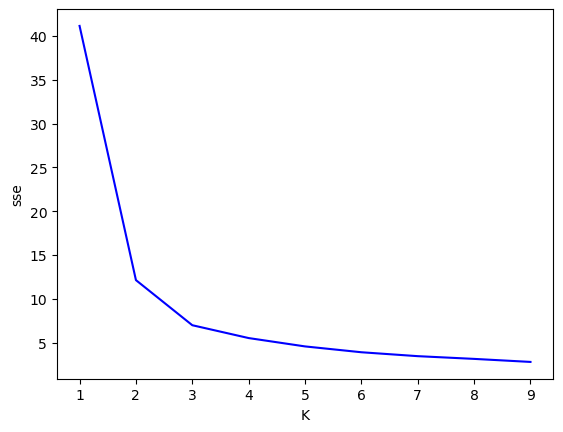

In [6]:
plt.xlabel('K')
plt.ylabel('sse')
plt.plot(k_rng, sse, color='blue')

In [7]:
km = KMeans(n_clusters=3, n_init=10)
y_predicted = km.fit_predict(df2)
df['cluster'] = y_predicted
df

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Part 2

In [8]:
d = dm(df2, df2, p=2)
d

array([[0.        , 0.21561354, 0.16810102, ..., 1.08257132, 1.14907064,
        0.96462829],
       [0.21561354, 0.        , 0.10157824, ..., 1.08390691, 1.17619813,
        0.95649502],
       [0.16810102, 0.10157824, 0.        , ..., 1.12088708, 1.19544459,
        0.98859665],
       ...,
       [1.08257132, 1.08390691, 1.12088708, ..., 0.        , 0.226928  ,
        0.18710825],
       [1.14907064, 1.17619813, 1.19544459, ..., 0.226928  , 0.        ,
        0.28409587],
       [0.96462829, 0.95649502, 0.98859665, ..., 0.18710825, 0.28409587,
        0.        ]])

In [9]:
avg_dissimilarity = []
m = len(d)
for i in range(m):
    total = sum(d[i])
    avg_dissimilarity.append(total/m)
avg_dissimilarity

[0.710406198236202,
 0.7138986862151165,
 0.7331428280458493,
 0.7318745290001425,
 0.7289888779248361,
 0.7203631947720547,
 0.7313492260044282,
 0.7000819128985032,
 0.7773679398645925,
 0.7218920520551985,
 0.7242977407104872,
 0.7108807042218028,
 0.7421556847047821,
 0.8265103558500383,
 0.8113556377135483,
 0.8621134352439145,
 0.7471221384958912,
 0.6937607139759608,
 0.7173906445985772,
 0.7341393002871166,
 0.6777652639033831,
 0.7028127916485095,
 0.8007733089648635,
 0.6376674587099815,
 0.6972992617841202,
 0.6942360366953089,
 0.6646808902046466,
 0.6998320643973082,
 0.69842017906821,
 0.7127923086027982,
 0.7035681576344529,
 0.6588257203026473,
 0.8330355365237214,
 0.8401710685040565,
 0.7218920520551985,
 0.7168876373517267,
 0.7143195814831513,
 0.7218920520551985,
 0.7775240673440745,
 0.6946481410279595,
 0.7075068333928404,
 0.8412607268061166,
 0.7734553660826652,
 0.6593644480603104,
 0.6998566739515535,
 0.7059922866531654,
 0.7446607116184024,
 0.7376189867152

In [10]:
first_clusters = []
for i in range(m):
    temp_arr = []
    for j in range(m):
        if d[i][j]<avg_dissimilarity[i]:
            temp_arr.append(j)
    first_clusters.append(temp_arr)

In [11]:
df3 = pd.DataFrame(first_clusters)
df3.to_csv('op.csv', index=False)

In [12]:
def cluster_reducton(clusters):
    final_clusters = []
    for cluster in clusters:
        is_subset = False
        for existing_cluster in final_clusters:
            if set(cluster).issubset(existing_cluster):
                is_subset = True
                break;
        if not is_subset:
            final_clusters.append(cluster)
    for first_cluster in final_clusters:
        for second_cluster in final_clusters:
            if set(second_cluster).issubset(first_cluster):
                final_clusters.remove(second_cluster)
    return final_clusters

In [13]:
def similarity(clusters):
    p = len(clusters)
    similarity_matrix = [[0.0] *p for _ in range(p)]
    for i in range(p):
        for j in range(i, p):
            intersection = len(set(clusters[i]) & set(clusters[j]))
            union = len(set(clusters[i]) | set(clusters[j]))
            similarity_matrix[i][j] = intersection/union
            similarity_matrix[j][i] = intersection/union
    return similarity_matrix

In [14]:
def get_joining_clusters(similarity_matrix):
    p = len(similarity_matrix)
    max = 0.0
    l_index = 0
    r_index = 0
    for i in range(p):
        for j in range(i, p):
            value = similarity_matrix[i][j]
            if i != j and value > max:
                max = similarity_matrix[i][j]
                l_index = i
                r_index = j
    return l_index, r_index

In [15]:
def unite(clusters, i, j):
    temp_clusters = clusters
    temp_cluster_i = clusters[i]
    temp_cluster_j = clusters[i]
    temp_clusters.append(list(set(temp_cluster_i).union(temp_cluster_j)))
    del temp_clusters[i]
    del temp_clusters[j]
    return temp_clusters

In [16]:
def final_test(first_clusters):
    temp_clusters = first_clusters
    for i in range(2):
        clusters = cluster_reducton(temp_clusters)
        similarity_matrix = similarity(clusters)
        i, j= get_joining_clusters(similarity_matrix)
        final_clusters = unite(clusters, i, j)
        temp_clusters = final_clusters
    return temp_clusters


semi_final_clusters = final_test(first_clusters)

df5 = pd.DataFrame(semi_final_clusters)
df5

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,0,1,2,3,4,5,6,7,8,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23,51,53,54,55,56,57,58,59,60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,50,51,52,53,54,55,56,57,58,59,...,139.0,140.0,141.0,142.0,143.0,145.0,146.0,147.0,148.0,149.0
3,50,51,52,53,54,55,56,58,59,61,...,140.0,141.0,142.0,143.0,144.0,145.0,146.0,147.0,148.0,149.0
4,23,50,51,52,53,54,55,56,57,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
def remove_overlap(clusters):
    for  i in range(len(clusters)):
        for obj in clusters[i]:
            current_sim = 1/len(clusters[i])
            temp_sim = [0.0] * len(clusters)
            j = (i+1)%len(clusters)
            while j != i:
                if obj in clusters[j]:
                    temp_sim[j] = 1/len(clusters[j])
                    clusters[j].remove(obj);
                j = (j+1)%len(clusters)
            max_sim = max(temp_sim)
            index = temp_sim.index(max_sim)
            if max_sim>current_sim:
                clusters[index].append(obj)
                clusters[i].remove(obj)
    return clusters
final_clusters = remove_overlap(semi_final_clusters)

df6 = pd.DataFrame(semi_final_clusters)
df6

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,1,2,3,4,5,6,7,8,9,...,41.0,42.0,43.0,44.0,45.0,46.0,47.0,48.0,49.0,88.0
1,51,56,60,64,68,72,75,78,83,86,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,88,100,102,104,105,110,112,114,120,124,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,52,74,88,98,112,116,118,130,135,140,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,88,59,67,80,89,94,99,54,57,61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df6.to_csv('op.csv', index=False)

In [19]:
count=0
for cluster in final_clusters:
    for obj in cluster:
        count+=1
print(count)

153
